In [6]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

INPUT_PATH = Path('../input')
OUTPUT_PATH = Path('../output')
pd.set_option('display.float_format', str)

In [7]:
def get_feature_total(df, col_name):
    return data['client_id'].map(df.groupby(['client_id', col_name]).size().index.get_level_values('client_id').value_counts()).fillna(0)


def get_feature_most_common(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].agg(lambda x: scipy.stats.mode(x)[0][0])).fillna(fill_na_value)


def get_feature_max(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].max()).fillna(fill_na_value)


def get_feature_min(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].min()).fillna(fill_na_value)


def get_feature_mean(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].mean()).fillna(fill_na_value)


def get_feature_std(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].std()).fillna(fill_na_value)


def get_feature_max_min(df, col_name, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name].agg(lambda x: x.max() - x.min())).fillna(fill_na_value)


def get_feature_timedelta(df, col_name):
    return data['client_id'].map(df.groupby('client_id')[col_name].agg(lambda x: (x.max() - x.min()).days)).fillna(-1)


def get_feature_diff(df, col_name1, col_name2, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name1].sum() - df.groupby('client_id')[col_name2].sum()).fillna(fill_na_value)


def get_feature_rate(df, col_name1, col_name2, fill_na_value):
    return data['client_id'].map(df.groupby('client_id')[col_name1].sum() / (df.groupby('client_id')[col_name2].sum() + 1e-12)).fillna(fill_na_value)


def create_features_transactions(data):
    
    data['total_transactions'] = data['client_id'].map(transactions.groupby('client_id').size()).fillna(0)
#     data['total_transactions_cards'] = get_feature_total(transactions, 'card_id')

#     data['total_transaction_amount'] = data['client_id'].map(transactions.groupby('client_id')['tran_amt_rur'].sum()).fillna(0) # add monthly, daily, etc
    data['mean_transaction_amt'] = get_feature_mean(transactions, 'tran_amt_rur', -1) # add monthly, daily, etc
    data['std_transaction_amount'] = get_feature_std(transactions, 'tran_amt_rur', -1) # add monthly, daily, etc
    
    data['total_transactions_mcc_cd'] = get_feature_total(transactions, 'mcc_cd')
    data['total_transactions_share_mcc_cd'] = (data['total_transactions_mcc_cd'] / data['total_transactions']).fillna(0)
#     data['most_common_transactions_mcc_cd'] = get_feature_most_common(transactions, 'mcc_cd', -1)
    
    data['total_transactions_merchant_cd'] = get_feature_total(transactions, 'merchant_cd')
    data['total_share_transactions_merchant_cd'] = (data['total_transactions_merchant_cd'] / data['total_transactions']).fillna(0)
#     data['most_common_transactions_merchant_cd'] = get_feature_most_common(transactions, 'merchant_cd', -1)
    
    data['total_transactions_txn_city'] = get_feature_total(transactions, 'txn_city')
    data['total_share_transactions_txn_city'] = (data['total_transactions_txn_city'] / data['total_transactions']).fillna(0)
    data['most_common_transactions_txn_city'] = get_feature_most_common(transactions, 'txn_city', '<unknown>')
    
    data['total_transactions_tsp_name'] = get_feature_total(transactions, 'tsp_name')
    data['total_share_transactions_tsp_name'] = (data['total_transactions_tsp_name'] / data['total_transactions']).fillna(0)
    data['most_common_transactions_tsp_name'] = get_feature_most_common(transactions, 'tsp_name', '<unknown>')
    
#     data['total_transactions_txn_comment_1'] = get_feature_total(transactions, 'txn_comment_1')
#     data['most_common_transactions_txn_comment_1'] = get_feature_most_common(transactions, 'txn_comment_1', '<unknown>')
    
#     data['total_transactions_txn_comment_2'] = get_feature_total(transactions, 'txn_comment_2')
#     data['most_common_transactions_txn_comment_2'] = get_feature_most_common(transactions, 'txn_comment_2', '<unknown>')
    
#     data['total_transactions_brs_mcc_group'] = get_feature_total(transactions, 'brs_mcc_group')
#     data['most_common_transactions_brs_mcc_group'] = get_feature_most_common(transactions, 'brs_mcc_group', '<unknown>')
    
#     data['total_transactions_brs_mcc_subgroup'] = get_feature_total(transactions, 'brs_mcc_subgroup')
#     data['most_common_transactions_brs_mcc_subgroup'] = get_feature_most_common(transactions, 'brs_mcc_subgroup', '<unknown>')
    return data


def create_features_aum(data):
    
    data['total_aum'] = data['client_id'].map(assets_under_management.groupby('client_id').size()).fillna(0)
    
#     data['total_aum_product_code'] = get_feature_total(assets_under_management, 'product_code')
#     data['most_common_aum_product_code'] = get_feature_most_common(assets_under_management, 'product_code', '<unknown>').value_counts()
    
    data['mean_aum_balance_rur_amt'] = get_feature_mean(assets_under_management, 'balance_rur_amt', -1)
    data['std_aum_balance_rur_amt'] = get_feature_std(assets_under_management, 'balance_rur_amt', -1)
    data['max_min_aum_balance_rur_amt'] = get_feature_max_min(assets_under_management, 'balance_rur_amt', -1)
    
    return data


def create_features_balance(data):
    
    data['total_balance'] = data['client_id'].map(balance.groupby('client_id').size()).fillna(0)
    
#     data['total_balance_crncy_cd'] = get_feature_total(balance, 'crncy_cd')
#     data['most_common_balance_crncy_cd'] = get_feature_most_common(balance, 'crncy_cd', -1)
    
#     data['total_balance_eop_bal_sum_rur'] = get_feature_total(balance, 'eop_bal_sum_rur')
    data['total_share_balance_eop_bal_sum_rur'] = (get_feature_total(balance, 'eop_bal_sum_rur') / data['total_balance']).fillna(0)
    data['mean_balance_eop_bal_sum_rur'] = get_feature_mean(balance, 'eop_bal_sum_rur', -9999)
    data['std_balance_eop_bal_sum_rur'] = get_feature_std(balance, 'eop_bal_sum_rur', -9999)
    
    data['total_balance_min_bal_sum_rur'] = get_feature_total(balance, 'min_bal_sum_rur')
    data['total_share_balance_min_bal_sum_rur'] = (data['total_balance_min_bal_sum_rur'] / data['total_balance']).fillna(0)
    data['mean_balance_min_bal_sum_rur'] = get_feature_mean(balance, 'min_bal_sum_rur', -9999)
    data['std_balance_min_bal_sum_rur'] = get_feature_std(balance, 'min_bal_sum_rur', -9999)
    
    data['total_balance_max_bal_sum_rur'] = get_feature_total(balance, 'max_bal_sum_rur')
    data['total_share_balance_max_bal_sum_rur'] = (data['total_balance_max_bal_sum_rur'] / data['total_balance']).fillna(0)
    data['mean_balance_max_bal_sum_rur'] = get_feature_mean(balance, 'max_bal_sum_rur', -9999)
    data['std_balance_max_bal_sum_rur'] = get_feature_std(balance, 'max_bal_sum_rur', -9999)
    
    data['total_balance_avg_bal_sum_rur'] = get_feature_total(balance, 'avg_bal_sum_rur')
    data['total_share_balance_avg_bal_sum_rur'] = (data['total_balance_avg_bal_sum_rur'] / data['total_balance']).fillna(0)
    data['mean_balance_avg_bal_sum_rur'] = get_feature_mean(balance, 'avg_bal_sum_rur', -9999)
#     data['std_balance_avg_bal_sum_rur'] = get_feature_std(balance, 'avg_bal_sum_rur', -9999)
    data['max_min_balance_avg_bal_sum_rur'] = get_feature_max_min(balance, 'avg_bal_sum_rur', -9999)
    
#     data['total_balance_prod_cat_name'] = get_feature_total(balance, 'prod_cat_name')
#     data['most_common_balance_prod_cat_name'] = get_feature_most_common(balance, 'prod_cat_name', '<unknown>')
    
    data['total_balance_prod_group_name'] = get_feature_total(balance, 'prod_group_name')
#     data['most_common_balance_prod_group_name'] = get_feature_most_common(balance, 'prod_group_name', '<unknown>')

    return data


def create_features_client(data):
    
    data = data.merge(client, on='client_id')
#     data['match_client_region-region_cd'] = (data['client_region'] == data['region_cd']).astype(int)
    data = data.drop(['client_citizenship', 'client_job_type', 'client_gender'], axis=1)
    
    return data


def create_features_campaigns(data):
    
    data['total_campaigns'] = data['client_id'].map(campaigns.groupby('client_id').size()).fillna(0)
    
#     data['total_campaigns_agr_flg'] = get_feature_total(campaigns, 'agr_flg')
    data['mean_campaigns_agr_flg'] = get_feature_mean(campaigns, 'agr_flg', -1)
    
#     data['total_campaigns_otkaz'] = get_feature_total(campaigns, 'otkaz')
    data['mean_campaigns_otkaz'] = get_feature_mean(campaigns, 'otkaz', -1)
    
#     data['total_campaigns_dumaet'] = get_feature_total(campaigns, 'dumaet')
    data['mean_campaigns_dumaet'] = get_feature_mean(campaigns, 'dumaet', -1)
    
#     data['total_campaigns_ring_up_flg'] = get_feature_total(campaigns, 'ring_up_flg')
#     data['most_common_campaigns_ring_up_flg'] = get_feature_most_common(campaigns, 'ring_up_flg', -1)
    
#     data['total_campaigns_count_comm'] = get_feature_total(campaigns, 'count_comm')
#     data['most_common_campaigns_count_comm'] = get_feature_most_common(campaigns, 'count_comm', -1)
    
#     data['total_campaigns_channel'] = get_feature_total(campaigns, 'channel')
#     data['most_common_campaigns_channel'] = get_feature_most_common(campaigns, 'channel', '<unknown>')
    
#     data['total_campaigns_prod'] = get_feature_total(campaigns, 'prod')
    data['most_common_campaigns_prod'] = get_feature_most_common(campaigns, 'prod', '<unknown>')
    
#     data['diff_campaigns_otkaz-agr_flg'] = get_feature_diff(campaigns, 'otkaz', 'agr_flg', -999)
    
    data['rate_campaigns_otkaz-count_comm'] = get_feature_rate(campaigns, 'otkaz', 'count_comm', -999)
    data['rate_campaigns_agr_flg-count_comm'] = get_feature_rate(campaigns, 'agr_flg', 'count_comm', -999)
    data['rate_campaigns_not_ring_up_flg-count_comm'] = get_feature_rate(campaigns, 'not_ring_up_flg', 'count_comm', -999)
    data['rate_campaigns_ring_up_flg-count_comm'] = get_feature_rate(campaigns, 'ring_up_flg', 'count_comm', -999)
    
    return data


def create_features_deals(data):
    
    data['total_deals'] = data['client_id'].map(deals.groupby('client_id').size()).fillna(0)
    
#     data['total_deals_crncy_cd'] = get_feature_total(deals, 'crncy_cd')
#     data['most_common_deals_crncy_cd'] = get_feature_most_common(deals, 'crncy_cd', -1)
    
    data['total_deals_agrmnt_rate_active'] = get_feature_total(deals, 'agrmnt_rate_active')
    data['max_deals_agrmnt_rate_active'] = get_feature_max(deals, 'agrmnt_rate_active', -1)
    
#     data['total_deals_agrmnt_rate_passive'] = get_feature_total(deals, 'agrmnt_rate_passive')
    data['max_deals_agrmnt_rate_passive'] = get_feature_max(deals, 'agrmnt_rate_passive', -1)
    
    data['total_deals_agrmnt_sum_rur'] = get_feature_total(deals, 'agrmnt_sum_rur')
    data['mean_deals_agrmnt_sum_rur'] = get_feature_mean(deals, 'agrmnt_sum_rur', -1)
    data['std_deals_agrmnt_sum_rur'] = get_feature_std(deals, 'agrmnt_sum_rur', -1)
    
    data['total_deals_prod_type_name'] = get_feature_total(deals, 'prod_type_name')
    data['most_common_deals_prod_type_name'] = get_feature_most_common(deals, 'prod_type_name', '<unknown>')
    
    data['total_deals_argmnt_close_start_days'] = get_feature_total(deals, 'argmnt_close_start_days')
    data['max_deals_argmnt_close_start_days'] = get_feature_max(deals, 'argmnt_close_start_days', -1)
#     data['min_deals_argmnt_close_start_days'] = get_feature_min(deals, 'argmnt_close_start_days', -1)
    data['mean_deals_argmnt_close_start_days'] = get_feature_mean(deals, 'argmnt_close_start_days', -1)
    data['std_deals_argmnt_close_start_days'] = get_feature_std(deals, 'argmnt_close_start_days', -1)

    return data


def create_features_payments(data):
    
    data['total_payments'] = data['client_id'].map(payments.groupby('client_id').size()).fillna(0)
    
    data['mean_payments_sum_rur'] = get_feature_mean(payments, 'sum_rur', -1)
    data['std_payments_sum_rur'] = get_feature_std(payments, 'sum_rur', -1)
    data['min_payments_sum_rur'] = get_feature_min(payments, 'sum_rur', -1)
    data['max_payments_sum_rur'] = get_feature_max(payments, 'sum_rur', -1)
    
#     data['total_payments_pmnts_name'] = get_feature_total(payments, 'pmnts_name')
#     data['most_common_payments_pmnts_name'] = get_feature_most_common(payments, 'pmnts_name', '<unknown>')
    
    # payments 
#     data['last_known_salary'] = data['client_id'].map(payments.groupby('client_id').apply(lambda x: x['sum_rur'].iloc[0])).fillna(-1)
#     data['total_recieved_salary'] = data['client_id'].map(payments.groupby('client_id').apply(lambda x: x['sum_rur'].sum())).fillna(-1)
    
    data['timedelta_payments_day_dt'] = get_feature_timedelta(payments, 'day_dt')
    
    return data


def create_features_appl(data):
    
    data['total_appl'] = data['client_id'].map(appl.groupby('client_id').size()).fillna(0)
    
#     data['total_appl_prod_group_name'] = get_feature_total(appl, 'appl_prod_group_name')
#     data['most_common_appl_prod_group_name'] = get_feature_most_common(appl, 'appl_prod_group_name', '<unknown>')
    
    data['total_appl_prod_type_name'] = get_feature_total(appl, 'appl_prod_type_name')
    data['most_common_appl_prod_type_name'] = get_feature_most_common(appl, 'appl_prod_type_name', '<unknown>')
    
#     data['total_appl_stts_name_dc'] = get_feature_total(appl, 'appl_stts_name_dc')
#     data['most_common_appl_stts_name_dc'] = get_feature_most_common(appl, 'appl_stts_name_dc', '<unknown>')
    
#     data['total_appl_sale_channel_name'] = get_feature_total(appl, 'appl_sale_channel_name')
#     data['most_common_appl_sale_channel_name'] = get_feature_most_common(appl, 'appl_sale_channel_name', '<unknown>')
    
    data['timedelta_appl_month_end_dt'] = get_feature_timedelta(appl, 'month_end_dt')
    
    return data


def create_features_funnel(data):
    
    return data

In [8]:
%%time
# create features

funnel = pd.read_csv(INPUT_PATH / 'funnel.csv')

transactions = pd.read_csv(INPUT_PATH / 'trxn.csv')
dict_merchant_category_code = pd.read_csv(INPUT_PATH / 'dict_mcc.csv')

transactions['mcc_cd'] = transactions['mcc_cd'].fillna(-2)
transactions['txn_city'] = transactions['txn_city'].fillna('<UNK>')
transactions['tsp_name'] = transactions['tsp_name'].fillna('<UNK>')
transactions['txn_comment_2'] = transactions['txn_comment_2'].fillna('<UNK>')
transactions = transactions.merge(dict_merchant_category_code, on='mcc_cd', how='left')
transactions['brs_mcc_group'] = transactions['brs_mcc_group'].fillna('<UNK>')
transactions['brs_mcc_subgroup'] = transactions['brs_mcc_subgroup'].fillna('<UNK>')

assets_under_management = pd.read_csv(INPUT_PATH / 'aum.csv')

balance = pd.read_csv(INPUT_PATH / 'balance.csv')
balance['crncy_cd'] = balance['crncy_cd'].fillna(-2)
balance['prod_cat_name'] = balance['prod_cat_name'].fillna('<UNK>')
balance['prod_group_name'] = balance['prod_group_name'].fillna('<UNK>')

client = pd.read_csv(INPUT_PATH / 'client.csv')
client = client.rename(columns={
    'gender': 'client_gender',
    'age': 'client_age',
    'region': 'client_region',
    'city': 'client_city',
    'citizenship': 'client_citizenship',
    'education': 'client_education',
    'job_type': 'client_job_type'
})

campaigns = pd.read_csv(INPUT_PATH / 'com.csv')
campaigns['prod'] = campaigns['prod'].fillna('<UNK>')

deals = pd.read_csv(INPUT_PATH / 'deals.csv')
deals['crncy_cd'] = deals['crncy_cd'].fillna(-2)
deals['agrmnt_rate_active'] = deals['agrmnt_rate_active'].fillna(-2)
deals['agrmnt_rate_passive'] = deals['agrmnt_rate_passive'].fillna(-2)
deals['agrmnt_sum_rur'] = deals['agrmnt_sum_rur'].fillna(-2)
deals['prod_type_name'] = deals['prod_type_name'].fillna('<UNK>')
deals['argmnt_close_start_days'] = (pd.to_datetime(deals['agrmnt_close_dt']) - pd.to_datetime(deals['agrmnt_start_dt'])).dt.days.fillna(-2)

payments = pd.read_csv(INPUT_PATH / 'payments.csv')
payments['day_dt'] = pd.to_datetime(payments['day_dt'])

appl = pd.read_csv(INPUT_PATH / 'appl.csv')
appl['appl_stts_name_dc'] = appl['appl_stts_name_dc'].fillna('<UNK>')
appl['appl_sale_channel_name'] = appl['appl_sale_channel_name'].fillna('<UNK>')
appl['month_end_dt'] = pd.to_datetime(appl['month_end_dt'])

data = funnel.copy()

data = create_features_transactions(data)
data = create_features_aum(data)
data = create_features_balance(data)
data = create_features_client(data)
data = create_features_campaigns(data)
data = create_features_deals(data)
data = create_features_payments(data)
data = create_features_appl(data)
data = create_features_funnel(data)

/opt/conda/lib/python3.7/site-packages/decorator.py:231: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return caller(func, *(extras + args), **kw)


CPU times: user 32.7 s, sys: 797 ms, total: 33.5 s
Wall time: 33.4 s


In [213]:
def get_feature_time_since_last(df, col_name):
    max_col_time = df[col_name].max()
    return data['client_id'].map((max_col_time - df.groupby('client_id')[col_name].max()).dt.seconds / 3600).fillna(-1)


def get_feature_time_since_first(df, col_name):
    max_col_time = df[col_name].max()
    return data['client_id'].map((max_col_time - df.groupby('client_id')[col_name].min()).dt.seconds / 3600).fillna(-1)


def get_feature_days_since_last(df, col_name):
    max_col_time = df[col_name].max()
    return data['client_id'].map((max_col_time - df.groupby('client_id')[col_name].max()).dt.days).fillna(-1)


def get_feature_days_since_first(df, col_name):
    max_col_time = df[col_name].max()
    return data['client_id'].map((max_col_time - df.groupby('client_id')[col_name].min()).dt.days).fillna(-1)

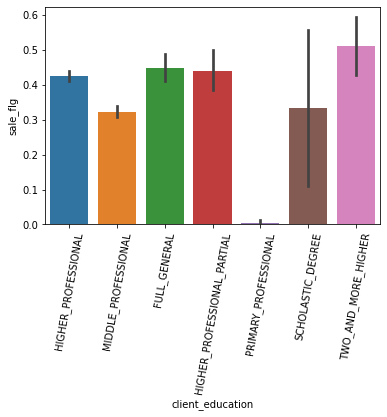

In [9]:
education_barplot = sns.barplot(x='client_education', y='sale_flg', data=data)
for item in education_barplot.get_xticklabels():
    item.set_rotation(80)
plt.show()

In [10]:
data[data['client_education'] == 'PRIMARY_PROFESSIONAL']['sale_flg'].value_counts()

0    237
1      1
Name: sale_flg, dtype: int64

In [58]:
age_bins = [data['client_age'].fillna(-1).quantile(x) for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]]
data['bins_10_client_age'] = pd.cut(data['client_age'], age_bins).astype(str)
data['bins_10_client_age'].value_counts()

(-1.0, 30.0]    2587
(33.0, 36.0]    2343
(49.0, 54.0]    2278
(36.0, 39.0]    2256
(54.0, 59.0]    2205
(45.0, 49.0]    2119
(30.0, 33.0]    2051
(39.0, 42.0]    2005
(59.0, 66.0]    1876
(42.0, 45.0]    1775
Name: bins_10_client_age, dtype: int64

In [59]:
data['comb_client_age-education'] = data['client_age'].fillna(-1).astype(str) + '-' + data['client_education'].fillna('NaN')
data['comb_client_age-education'].value_counts()

33.0-NaN                    470
35.0-NaN                    467
34.0-NaN                    448
37.0-NaN                    444
36.0-NaN                    439
                           ... 
56.0-SCHOLASTIC_DEGREE        1
62.0-SCHOLASTIC_DEGREE        1
52.0-TWO_AND_MORE_HIGHER      1
56.0-TWO_AND_MORE_HIGHER      1
22.0-HIGHER_PROFESSIONAL      1
Name: comb_client_age-education, Length: 317, dtype: int64

In [61]:
data['comb_bins_10_client_age-education'] = data['bins_10_client_age'] + '-' + data['client_education'].fillna('NaN')
data['comb_bins_10_client_age-education'].value_counts()

(-1.0, 30.0]-NaN                  1580
(33.0, 36.0]-NaN                  1354
(36.0, 39.0]-NaN                  1256
(54.0, 59.0]-NaN                  1251
(49.0, 54.0]-NaN                  1212
                                  ... 
(36.0, 39.0]-SCHOLASTIC_DEGREE       2
(45.0, 49.0]-SCHOLASTIC_DEGREE       2
(30.0, 33.0]-SCHOLASTIC_DEGREE       1
(42.0, 45.0]-SCHOLASTIC_DEGREE       1
(54.0, 59.0]-SCHOLASTIC_DEGREE       1
Name: comb_bins_10_client_age-education, Length: 79, dtype: int64

In [66]:
data['comb_client_education-segment'] = data['client_education'].fillna('NaN') + '-' + data['client_segment'].astype(str)
data['comb_client_education-segment'].value_counts()

NaN-14.0                    3505
NaN-13.0                    3258
NaN-3.0                     2202
HIGHER_PROFESSIONAL-1.0     1168
MIDDLE_PROFESSIONAL-3.0     1116
                            ... 
TWO_AND_MORE_HIGHER-12.0       1
TWO_AND_MORE_HIGHER-6.0        1
SCHOLASTIC_DEGREE-2.0          1
TWO_AND_MORE_HIGHER-15.0       1
SCHOLASTIC_DEGREE-16.0         1
Name: comb_client_education-segment, Length: 104, dtype: int64

In [77]:
transactions['tran_time'] = pd.to_datetime(transactions['tran_time'])
max_transactions_tran_time = 
max_transactions_tran_time

Timestamp('2019-08-31 23:58:15')

In [91]:
data['time_since_last_transactions_tran_time'] = get_feature_time_since_last(transactions, 'tran_time')
data['time_since_last_transactions_tran_time'].value_counts()

-1.0                  10262
23.970833333333335     1890
10.272222222222222        4
11.445833333333333        4
6.320833333333334         3
                      ...  
6.876666666666667         1
9.571111111111112         1
5.6025                    1
13.585277777777778        1
4.938611111111111         1
Name: time_since_last_transactions_tran_time, Length: 8651, dtype: int64

In [92]:
data['time_since_first_transactions_tran_time'] = get_feature_time_since_first(transactions, 'tran_time')
data['time_since_first_transactions_tran_time'].value_counts()

-1.0                  10262
23.970833333333335     2156
8.039722222222222         4
6.635555555555555         4
9.370555555555555         4
                      ...  
23.942222222222224        1
13.679722222222223        1
10.241944444444444        1
17.074444444444445        1
11.488055555555556        1
Name: time_since_first_transactions_tran_time, Length: 8367, dtype: int64

In [94]:
data['diff_time_since_first_last_transactions_tran_time'] = data['time_since_first_transactions_tran_time'] - data['time_since_last_transactions_tran_time']
data['diff_time_since_first_last_transactions_tran_time'].value_counts()

0.0                    11529
0.02111111111111086        4
1.131111111111112          3
2.3919444444444444         3
1.0969444444444445         3
                       ...  
-0.8888888888888875        1
3.856666666666667          1
16.228611111111114         1
4.522500000000001          1
10.149444444444445         1
Name: diff_time_since_first_last_transactions_tran_time, Length: 9752, dtype: int64

In [131]:
address_mapping = pd.read_csv('address_mapping_correct.csv')
address_mapping

,txn_city_corrected_name,txn_city_lat,txn_city_long,txn_city
0,Mytishchi,55.9248562,37.7552338,. MYTISHCHIN
1,UNIT 101,33.1357,-117.2220905,.SU
2,Russia,61.52401,105.318756,A
3,A.G.KOLODISCH,-1.0,-1.0,A.G.KOLODISCH
4,A.G.SEMKOVO,-1.0,-1.0,A.G.SEMKOVO
...,...,...,...,...
13578,Bykovo,55.6222772,38.0641286,ZYKOVO
13579,Zyryanka,65.767376,150.841238,ZYRYANKA
13580,Zyukayka,58.2084997,54.70734299999999,ZYUKAJKA
13581,Zyukayka,58.2084997,54.70734299999999,ZYUKAYKA


In [132]:
transactions.shape

(3035705, 13)

In [133]:
transactions.merge(address_mapping, on='txn_city', how='left').shape

(3035705, 16)

In [134]:
transactions = transactions.merge(address_mapping, on='txn_city', how='left')

In [137]:
data['total_transactions_txn_city_corrected_name'] = get_feature_total(transactions, 'txn_city_corrected_name')
data['total_transactions_txn_city_corrected_name'].value_counts()

0.0      10264
2.0       1765
1.0       1297
3.0       1215
4.0        964
         ...  
79.0         1
73.0         1
68.0         1
63.0         1
116.0        1
Name: total_transactions_txn_city_corrected_name, Length: 78, dtype: int64

In [143]:
data['most_common_transactions_txn_city']

0           <unknown>
1           <unknown>
2         N. NOVGOROD
3           RADUZHNYJ
4           <unknown>
             ...     
21493    NEFTEYUGANSK
21494       <unknown>
21495        KONAKOVO
21496          MOSCOW
21497          MOSCOW
Name: most_common_transactions_txn_city, Length: 21498, dtype: object

In [153]:
len(transactions[['txn_city', 'txn_city_lat']].groupby('txn_city').first().to_dict()['txn_city_lat'])

13584

In [154]:
data['most_common_transactions_txn_city'].map(transactions[['txn_city', 'txn_city_lat']].groupby('txn_city').first().to_dict()['txn_city_lat'])

0              NaN
1              NaN
2       56.3268684
3        62.103942
4              NaN
           ...    
21493   61.0952059
21494          NaN
21495   56.6965089
21496    55.755826
21497    55.755826
Name: most_common_transactions_txn_city, Length: 21498, dtype: float64

In [157]:
payments['day_dt'] = pd.to_datetime(payments['day_dt'])
payments = payments.sort_values(by='day_dt', ascending=False).reset_index(drop=True)

In [161]:
data['diff_salary_increasted_client'] = data['client_id'].map(payments.groupby('client_id')['sum_rur'].agg(lambda x: int(x.iloc[-1] - x.iloc[0]))).fillna(-99999)
data['diff_salary_increasted_client'].value_counts()

-99999.0    12544
0.0           534
1214.0         16
-1214.0        15
-2428.0        15
            ...  
-8708.0         1
148232.0        1
1233.0          1
53678.0         1
15407.0         1
Name: diff_salary_increasted_client, Length: 7586, dtype: int64

In [165]:
data['bin_salary_increasted_client'] = data['client_id'].map(payments.groupby('client_id')['sum_rur'].agg(lambda x: int(x.iloc[-1] > x.iloc[0]))).fillna(-1).astype(int)
data['bin_salary_increasted_client'].value_counts()

-1    12544
 1     4597
 0     4357
Name: bin_salary_increasted_client, dtype: int64

In [197]:
data['magic_feature_9-v01'] = data['feature_9'].apply(lambda x: str(x).split('.')[-1]).replace({'nan': np.nan}).fillna(-1).astype(int)
data['magic_feature_9-v01'].value_counts()

 9    16184
 4     5282
 0       19
-1       11
 5        2
Name: magic_feature_9-v01, dtype: int64

In [198]:
data['magic_feature_9-v02'] = data['feature_9'].apply(lambda x: str(x).split('.')[0]).replace({'nan': np.nan}).fillna(-1).astype(int)
data['magic_feature_9-v02'].value_counts()

 7     4656
 8     3180
 10    2980
 9     2601
 19    1869
 11    1761
 14    1636
 17    1324
 6      489
 15     400
 12     184
 13     172
 18     136
 16      99
-1       11
Name: magic_feature_9-v02, dtype: int64

In [203]:
appl

,client_id,month_end_dt,appl_prod_group_name,appl_prod_type_name,appl_stts_name_dc,appl_sale_channel_name
0,6886062013213911831,2018-10-31,PILS,PILS,The consultation is over,Network
1,4497537671718296975,2018-10-31,PILS,PILS,The consultation is over,Network
2,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
3,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
4,1316154201527307743,2018-09-30,PILS,PILS,The consultation is over,Network
...,...,...,...,...,...,...
12025,-7051552770088413806,2019-03-31,Mortgage,Mortgage,four,<UNK>
12026,-2283863549841851654,2019-02-28,Mortgage,Mortgage,four,<UNK>
12027,4409001434092016310,2019-03-31,Mortgage,Mortgage,2,<UNK>
12028,-2119157901008689776,2018-11-30,Cards,Credit cards,Issuing a card,UCHK


In [216]:
data['days_since_last_appl_month'] = get_feature_days_since_last(appl, 'month_end_dt')
data['days_since_last_appl_month'].value_counts()

-1.0     15289
153.0      716
274.0      683
243.0      676
304.0      636
184.0      570
0.0        525
335.0      495
212.0      414
62.0       405
31.0       402
92.0       398
123.0      289
Name: days_since_last_appl_month, dtype: int64

In [217]:
data['days_since_first_appl_month'] = get_feature_days_since_first(appl, 'month_end_dt')
data['days_since_first_appl_month'].value_counts()

-1.0     15289
304.0      895
274.0      814
335.0      789
243.0      768
153.0      669
184.0      557
212.0      456
92.0       320
123.0      280
0.0        242
62.0       215
31.0       204
Name: days_since_first_appl_month, dtype: int64

In [221]:
deals

,client_id,agrmnt_start_dt,agrmnt_close_dt,crncy_cd,agrmnt_rate_active,agrmnt_rate_passive,agrmnt_sum_rur,prod_type_name,argmnt_close_start_days
0,7513301859607023584,2010-08-12,2014-10-30,810.0,-2.0,-2.0,0.0,Cash on demand,1540.0
1,7513301859607023584,2013-02-15,2013-08-16,810.0,-2.0,-2.0,0.0,Cash on demand,182.0
2,7513301859607023584,2013-08-16,2014-02-14,810.0,-2.0,-2.0,0.0,Cash on demand,182.0
3,7513301859607023584,2015-07-12,2015-07-12,810.0,-2.0,-2.0,0.0,Cash on demand,0.0
4,7513301859607023584,2015-07-12,2015-07-12,810.0,-2.0,-2.0,0.0,Cash on demand,0.0
...,...,...,...,...,...,...,...,...,...
109011,-8242641659611256965,2011-08-10,2011-08-10,810.0,-2.0,-2.0,0.0,POST OFFICE,0.0
109012,-8242641659611256965,2011-08-10,2018-07-03,810.0,-2.0,3.25,13089.0,POST OFFICE,2519.0
109013,-8242641659611256965,2011-08-10,2011-08-10,810.0,-2.0,-2.0,0.0,POST OFFICE,0.0
109014,-8242641659611256965,2011-08-23,2012-09-18,810.0,-2.0,7.0,5403.0,POST OFFICE,392.0


In [226]:
deals['agrmnt_close_dt'] = pd.to_datetime(deals['agrmnt_close_dt'])
deals['agrmnt_close_dt']

0        2014-10-30
1        2013-08-16
2        2014-02-14
3        2015-07-12
4        2015-07-12
            ...    
109011   2011-08-10
109012   2018-07-03
109013   2011-08-10
109014   2012-09-18
109015   2017-07-31
Name: agrmnt_close_dt, Length: 109016, dtype: datetime64[ns]

In [232]:
data['days_since_last_deals_agrmnt_close'] = get_feature_days_since_last(deals, 'agrmnt_close_dt')
data['days_since_last_deals_agrmnt_close'].value_counts()

-1.0      8064
301.0      498
393.0      277
260.0      270
351.0      126
          ... 
570.0        1
5155.0       1
1546.0       1
3300.0       1
1174.0       1
Name: days_since_last_deals_agrmnt_close, Length: 1876, dtype: int64

In [233]:
data['days_since_first_deals_agrmnt_close'] = get_feature_days_since_first(deals, 'agrmnt_close_dt')
data['days_since_first_deals_agrmnt_close'].value_counts()

-1.0      8064
1369.0     207
393.0      197
301.0      193
1099.0     155
          ... 
3695.0       1
1093.0       1
3138.0       1
3250.0       1
2150.0       1
Name: days_since_first_deals_agrmnt_close, Length: 3132, dtype: int64

In [234]:
funnel

,client_id,sale_flg,sale_amount,contacts,feature_1,client_segment,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,region_cd
0,7513301859607023584,0,NaN,1,7,13.0,571533.0,15717.0,0.0,0.0,0.0,571852.0,472605.0,10.4,12548.0,86.0
1,9157009756404187626,0,NaN,1,3,13.0,3642369.0,94787.0,0.0,0.0,84823.0,3642369.0,3314257.0,8.9,77210.0,2.0
2,-1893104556496814867,0,NaN,1,5,16.0,352826.0,5500.0,0.0,6822.0,0.0,265893.0,204534.0,8.9,5508.0,52.0
3,6886062013213911831,0,NaN,1,4,3.0,6070615.0,40580.0,0.0,30401.0,0.0,2005731.0,1825051.0,7.9,40583.0,86.0
4,-8156468515495593794,1,138018.05000000002,1,7,14.0,3642369.0,97156.0,81488.0,0.0,160308.0,3642369.0,3314257.0,10.4,78108.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21493,4662551505651924284,0,NaN,2,3,3.0,6070615.0,97616.0,21921.0,85635.0,89802.0,4826139.0,4391391.0,7.9,97626.0,86.0
21494,-8968737688687691353,0,NaN,1,9,14.0,1821184.0,2428.0,3952.0,0.0,13938.0,92273.0,71641.0,19.9,2440.0,78.0
21495,-5799097497074119478,0,NaN,1,2,16.0,6070615.0,64991.0,0.0,13450.0,0.0,3212569.0,2923175.0,7.9,64998.0,69.0
21496,-2264802671063321355,1,43882.85000000001,2,8,4.0,2282408.0,5832.0,16185.0,0.0,82182.0,230683.0,177449.0,17.9,5845.0,59.0


In [239]:
funnel['feature_1'].value_counts()

7     2675
5     2637
4     2516
1     2491
6     2388
8     2196
9     2012
3     1676
2     1122
12     726
11     440
10     376
13     163
0       51
14      29
Name: feature_1, dtype: int64